# Задание 2

In [185]:
import zipfile
import pandas as pd
import os
import re
from langdetect import detect
import spacy
import matplotlib.pyplot as mpl
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

In [102]:
path = r'C:\Users\VADIK\Documents\ВШЭ\final\data\NN-methods-2021-2022\HW_1'
data = pd.read_csv(os.path.join(path, 'Shoes_Data.csv'), 
                 sep=',',
                 header=0
                )
data.columns

Index(['title', 'price', 'rating', 'total_reviews', 'product_description',
       'reviews', 'reviews_rating', 'Shoe Type'],
      dtype='object')

In [103]:
df = data[['reviews', 'reviews_rating']]
df['reviews'] = df['reviews'].transform(lambda x: x.split('||'))
df['reviews_rating'] = df['reviews_rating'].transform(lambda x: x.split('||'))

<ipython-input-103-a7895822b289>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'] = df['reviews'].transform(lambda x: x.split('||'))
<ipython-input-103-a7895822b289>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_rating'] = df['reviews_rating'].transform(lambda x: x.split('||'))


In [104]:
assert len(df['reviews'].sum()) == len(df['reviews_rating'].sum())

In [105]:
final_df = pd.DataFrame([])
final_df['review'] = df['reviews'].sum()
final_df['review_rating'] = df['reviews_rating'].sum()
df = final_df
df.drop_duplicates(inplace=True)
df.shape

(5493, 2)

### Язык

In [106]:
def detect_lang(x):
    try:
        lang = detect(x)
    except Exception as e:
        lang = str(Exception)
    return lang

In [107]:
%%time
df['review_lang'] = df['review'].transform(lambda x: detect_lang(x))

Wall time: 44.6 s


In [108]:
df[df['review_lang'] != 'en']['review'].unique().tolist()

[' AVERAGE PRODUCT',
 ' Pic more beautiful',
 ' Do not buy it anyway',
 ' Best for gym n sports',
 ' Must must must buy',
 ' Awesome Amazon Awesome',
 ' 5 star',
 ' No buy',
 'Sup quality',
 ' Awesome 👌.!',
 'Best',
 ' Must bye for puja',
 'Awesome',
 ' Nice Product',
 ' Nice',
 ' Bad',
 'Bang for buck(paise)',
 ' Got one',
 ' Poor quality',
 ' Superb quality.',
 ' Yah product mujhe bahut achcha',
 ' Good',
 'Great looking shoes I like it',
 ' Total Fake',
 ' Disappointed',
 ' Superb product',
 ' Nice product',
 ' Niceee',
 '1 no. Hai Bhai .... love it',
 ' Excellent sneakers',
 ' Chep And best.',
 ' Gud for price',
 ' Awesome Shoes',
 ' I dont like thik',
 ' Bad quantity',
 ' Junaid khan',
 ' My Views',
 ' Budget Loafer for Mens',
 ' Paisa vasul product...',
 ' Pasting not good',
 ' Review',
 ' On time delivered',
 ' Shoes',
 ' Very waste',
 ' Too good',
 ' Wrost product !',
 ' Excellent',
 ' Nice 🙂 product',
 ' Nice colours',
 ' Paisa wasool .........',
 ' Superb!!',
 ' Excellent Val

Прошлый метод плохо отфильтровывает короткие отзывы на английском. Поступим иначе: посмотрим, есть ли латинские буквы в отзыве, а впоследствии уберем нечастотные слова и слишком короткие отзывы.

In [109]:
def detect_alpha(x):
    x = re.sub('[^a-z]', '', x.lower())
    if x != '':
        return True
    else:
        return False

In [110]:
%%time
df['review_lang'] = df['review'].transform(lambda x: detect_alpha(x))

Wall time: 14 ms


In [111]:
df[df['review_lang'] == False]

,review,review_rating,review_lang
212,बहुत ही खराब सामान,2.0 out of 5 stars,False
349,5*,5.0 out of 5 stars,False
402,सुझाव,2.0 out of 5 stars,False
583,👎🏻,1.0 out of 5 stars,False
585,⭐️⭐️⭐️⭐️⭐️,5.0 out of 5 stars,False
788,2,2.0 out of 5 stars,False
952,बहुत बढिया,5.0 out of 5 stars,False
986,..,5.0 out of 5 stars,False
1186,😠😠😠,1.0 out of 5 stars,False
1269,👍,5.0 out of 5 stars,False


Получаем более "чистый" результат. Эти отзывы точно можно удалить.

In [112]:
indexes = df[df['review_lang'] == False].index.tolist()
df.drop(indexes, axis=0, inplace=True)
df.reset_index(drop=True)
df.shape

(5438, 3)

### Лемматизация и длина отзывов

In [113]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [114]:
def lemmatization(sentence, nlp):
    doc = nlp(sentence)
    return [token.lemma_.lower() for token in doc if re.sub('[^a-z]', '', token.lemma_.lower()).isalpha()]

In [115]:
%%time
df['review_lem'] = df['review'].transform(lambda x: lemmatization(x, nlp))

Wall time: 8.33 s


In [116]:
df['review_length'] = df['review_lem'].transform(lambda x: len(x))

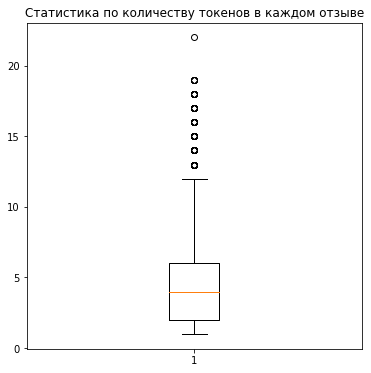

In [117]:
mpl.figure(figsize=[6, 6])
mpl.boxplot(df['review_length'])
mpl.title('Статистика по количеству токенов в каждом отзыве')
mpl.show()

В каждом отзыве остался хотя бы один токен. Уберем стоп-слова.

### Стопслова

In [118]:
def remove_stopwords(x, words):
    for i, el in enumerate(x):
        if el in words:
            x.pop(i)
    return x

In [119]:
%%time
en_stopwords = stopwords.words('english')
df['no_stopwords_review'] = df['review_lem'].transform(lambda x: remove_stopwords(x, en_stopwords))

Wall time: 35.9 ms


In [120]:
lemmas = pd.DataFrame(df['no_stopwords_review'].sum())
lemmas['count'] = 1
lemmas = lemmas.groupby(0).count().sort_values('count', ascending=False)
print('{} лемм осталось на данном этапе'.format(lemmas.shape[0]))

2188 лемм осталось на данном этапе


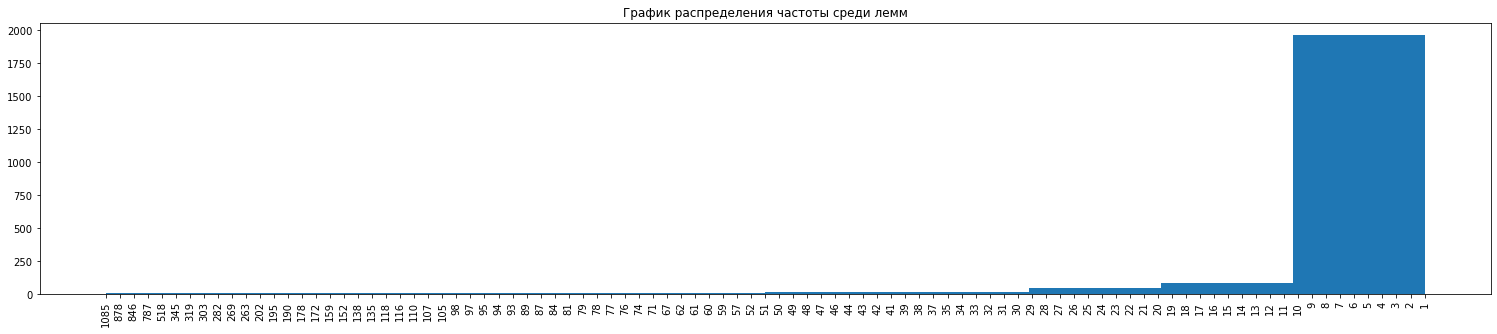

In [121]:
mpl.figure(figsize=[26, 5])
mpl.hist(x=lemmas['count'].transform(lambda x: str(x)))
mpl.xticks(rotation=90)
mpl.title('График распределения частоты среди лемм')
mpl.show()

In [122]:
lemmas[lemmas['count'] >= 200]

,count
0,
good,1085
product,878
shoe,846
-pron-,787
quality,518
comfortable,345
size,319
not,303
buy,282


Уберем только '-pron-'.

In [123]:
%%time
en_stopwords_additional = ['-pron-']
df['no_stopwords_review'] = df['no_stopwords_review'].transform(lambda x: remove_stopwords(x, en_stopwords_additional))

Wall time: 4.02 ms


In [124]:
df['no_stopwords_review_length'] = df['no_stopwords_review'].transform(lambda x: len(x))

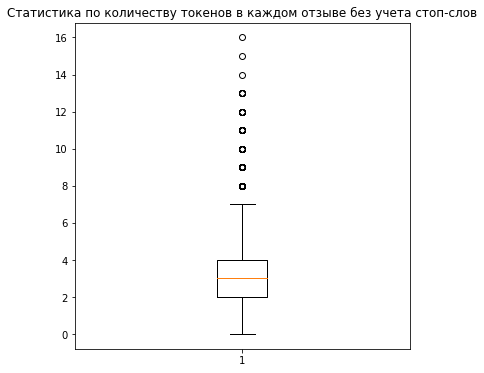

In [125]:
mpl.figure(figsize=[6, 6])
mpl.boxplot(df['no_stopwords_review_length'])
mpl.title('Статистика по количеству токенов в каждом отзыве без учета стоп-слов')
mpl.show()

Медиана находится на 3 токенах. Мне кажется нормальным, что некоторые отзывы состоят всего лишь из одного слова, так как оно зачастую оказывается эмоциально окрашенным. Поэтому уберем только те отзывы, в которых совсем не осталось токенов после предобработки.

In [126]:
df = df[df['no_stopwords_review_length'] != 0]
df.reset_index(drop=True)
print('Всего осталось отзывов: {}'.format(df.shape[0]))

Всего осталось отзывов: 5428


In [127]:
df['no_stopwords_review'] = df['no_stopwords_review'].transform(lambda x: ' '.join(x))

<ipython-input-127-33bf20f0cde4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stopwords_review'] = df['no_stopwords_review'].transform(lambda x: ' '.join(x))


### Распределение на классы

In [128]:
classes = df.groupby('review_rating').count()
classes

,review,review_lang,review_lem,review_length,no_stopwords_review,no_stopwords_review_length
review_rating,,,,,,
1.0 out of 5 stars,968,968,968,968,968,968
2.0 out of 5 stars,336,336,336,336,336,336
3.0 out of 5 stars,483,483,483,483,483,483
4.0 out of 5 stars,879,879,879,879,879,879
5.0 out of 5 stars,1941,1941,1941,1941,1941,1941
1.0 out of 5 stars,192,192,192,192,192,192
2.0 out of 5 stars,52,52,52,52,52,52
3.0 out of 5 stars,90,90,90,90,90,90
4.0 out of 5 stars,132,132,132,132,132,132


Видимо, где-то есть лишние пробелы. Обработаем строки, чтобы получить единые классы.

In [129]:
df['review_rating'] = df['review_rating'].transform(lambda x: x.strip(' ').split('.')[0])

<ipython-input-129-c119f54abb37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_rating'] = df['review_rating'].transform(lambda x: x.strip(' ').split('.')[0])


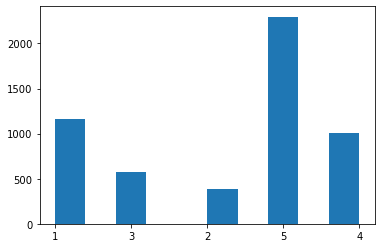

In [130]:
mpl.hist(x=df['review_rating'])
mpl.show()

Классы получились несбалансированными. Посмотрим, какой длины отзывы в классе 5.

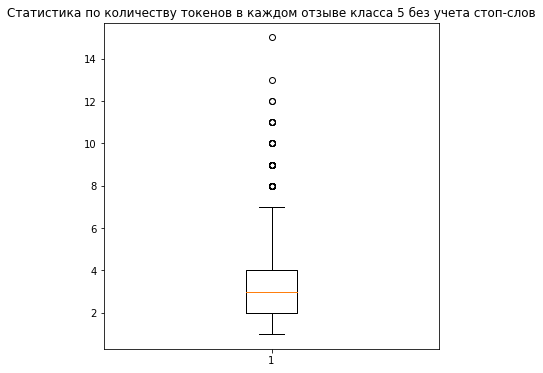

In [131]:
mpl.figure(figsize=[6, 6])
mpl.boxplot(df[df['review_rating'] == '5']['no_stopwords_review_length'])
mpl.title('Статистика по количеству токенов в каждом отзыве класса 5 без учета стоп-слов')
mpl.show()

In [135]:
df[(df['review_rating'] == '5')&(df['no_stopwords_review_length'] > 2)].shape

(1152, 7)

Оставим только те отзывы из класса 5, в которых больше 3 токенов.

In [139]:
indexes = df[(df['review_rating'] == '5')&(df['no_stopwords_review_length'] <= 2)].index.tolist()
df.drop(indexes, axis=0, inplace=True)

C:\Users\VADIK\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Ревью из классов 3 и 2, напротив, дуплицируем.

In [141]:
df2 = df[df['review_rating'] == '2']
df3 = df[df['review_rating'] == '3']
df = pd.concat([df, df2, df3], axis=0)
df.reset_index(drop=True, inplace=True)

Теперь классы относительно сбалансированы.

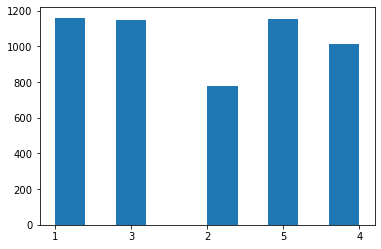

In [147]:
mpl.hist(x=df['review_rating'])
mpl.show()

In [149]:
df.shape[0]

5245

### Векторизация

In [213]:
y = np.array([df['review_rating']]).T

In [214]:
bow_vectorizer = CountVectorizer()
bow_X = bow_vectorizer.fit_transform(df['no_stopwords_review'])

In [240]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_X, y, test_size=0.2, random_state=0)

In [215]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_X = bow_vectorizer.fit_transform(df['no_stopwords_review'])

In [216]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_X, y, test_size=0.2, random_state=0)

### Обучение

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Logistic Regression

In [248]:
%%time
lr = LogisticRegression()

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                  'max_iter': [800, 1000],
                  'multi_class': ['auto']
                 }
grid_search = GridSearchCV(lr, param_grid=parameter_grid, scoring='accuracy')
grid_search.fit(X_train_bow, np.ravel(y_train))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.507624723310063
Best parameters: {'C': 10.0, 'class_weight': None, 'max_iter': 800, 'multi_class': 'auto', 'penalty': 'l2'}
Wall time: 53.4 s


In [246]:
%%time
lr_bow= LogisticRegression(C=0.08,
                           class_weight='balanced',
                           max_iter=800,
                           multi_class='auto',
                           penalty='l2')
lr_bow.fit(X_train_bow, np.ravel(y_train))
y_pred = lr_bow.predict(X_test_bow)
print('Score: {}'.format(accuracy_score(y_test, y_pred)))

Score: 0.4861773117254528
Wall time: 142 ms


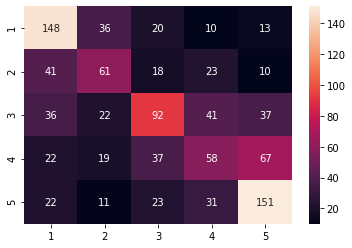

In [247]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'],)

In [235]:
%%time
lr = LogisticRegression()

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                  'max_iter': [800, 1000],
                  'multi_class': ['auto']
                 }
grid_search = GridSearchCV(lr, param_grid=parameter_grid, scoring='accuracy')
grid_search.fit(X_train_tfidf, np.ravel(y_train))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.507624723310063
Best parameters: {'C': 10.0, 'class_weight': None, 'max_iter': 800, 'multi_class': 'auto', 'penalty': 'l2'}
Wall time: 53.6 s


In [236]:
%%time
lr_tfidf= LogisticRegression(C=10.0,
                           class_weight=None,
                           max_iter=800,
                           multi_class='auto',
                           penalty='l2')
lr_tfidf.fit(X_train_tfidf, np.ravel(y_train))
y_pred = lr_tfidf.predict(X_test_tfidf)
print('Score: {}'.format(accuracy_score(y_test, y_pred)))

Score: 0.5481410867492851
Wall time: 640 ms


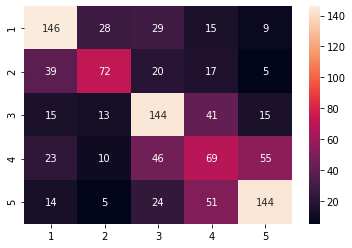

In [237]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'],)

### Decision Tree Classifier

In [257]:
%%time
dtc = DecisionTreeClassifier()

parameter_grid = {'splitter' : ['best', 'random'],
                  'max_depth' : [2, 3, 4, 5, 10, 20, 30, 100]}

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_bow, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.4744988364833419
Best parameters: {'max_depth': 100, 'splitter': 'best'}
Wall time: 410 ms


In [258]:
%%time
dtc_bow = DecisionTreeClassifier(splitter='best',
                                 max_depth=100)
dtc_bow.fit(X_train_bow, np.ravel(y_train))
y_pred = dtc_bow.predict(X_test_bow)
print('Score: {}'.format(accuracy_score(y_test, y_pred)))

Score: 0.5081029551954243
Wall time: 95.3 ms


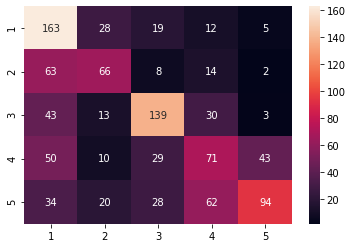

In [259]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'],)

In [260]:
%%time
dtc = DecisionTreeClassifier()

parameter_grid = {'splitter' : ['best', 'random'],
                  'max_depth' : [2, 3, 4, 5, 10, 20, 30, 100]}

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.47259606107043534
Best parameters: {'max_depth': 100, 'splitter': 'random'}
Wall time: 423 ms


In [261]:
%%time
dtc_tfidf = DecisionTreeClassifier(splitter='random',
                                 max_depth=100)
dtc_tfidf.fit(X_train_tfidf, np.ravel(y_train))
y_pred = dtc_tfidf.predict(X_test_tfidf)
print('Score: {}'.format(accuracy_score(y_test, y_pred)))

Score: 0.5061963775023832
Wall time: 92.8 ms


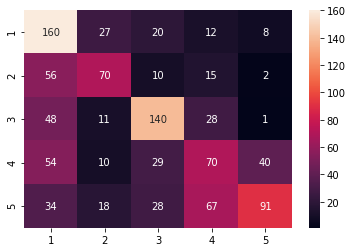

In [262]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'],)